# Generierung von synthetischen Datensätzen

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from ts_gen import DataGenerator
from ts_gen import Preprocessor
from ts_gen import WebAnalyticsOutlierSimulator

%matplotlib inline

## Eingabedaten laden

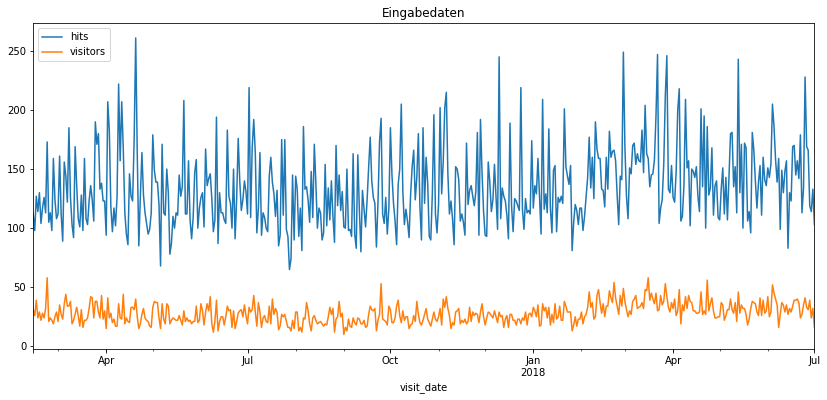

In [2]:
originalInput = pd.read_csv("../data/owa_generator_input.csv")
originalInput["visit_date"] =  pd.to_datetime(originalInput["visit_date"])
originalInput = originalInput.set_index("visit_date")

originalInput.plot(figsize=(14,6), title="Eingabedaten")
plt.margins(x=0)
plt.show()

## SYN-1-Datensatz

Datensatz mit 90 Datenpunkten und 20% Outlier-Anteil, der sich nur auf die Aufrufe auswirkt.

C:\Users\Andre\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


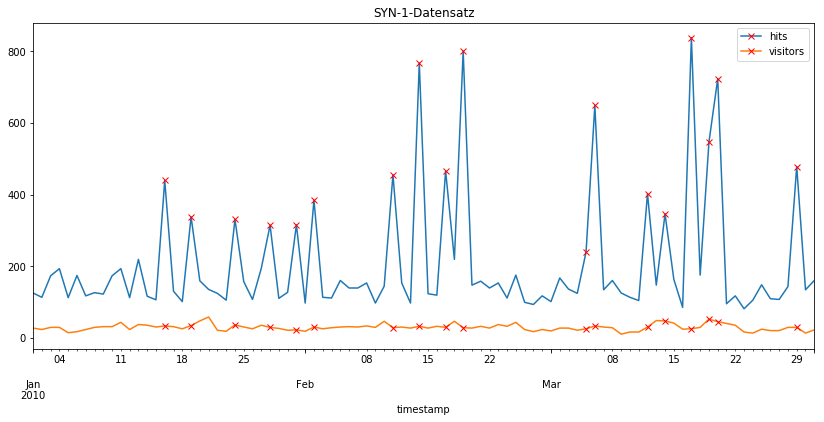

In [3]:
pre = Preprocessor(approximateStateSize=1)
gen = DataGenerator(pre, originalInput)
df = gen.generateSyntheticData(seed=1, periods=90)
df = df.set_index("timestamp")

osim = WebAnalyticsOutlierSimulator(df)
osim.insertPointOutliers(["hits"], absoluteStartIndex=15, freq=0.1, weight=0.6, seed=1)
osim.insertPointOutliers(["hits"], absoluteStartIndex=15, freq=0.1, weight=1.2, seed=1)

outliers = osim.result["anomalyClass"] == 1
osim.result[["hits", "visitors"]].plot(figsize=(14,6), marker="x", markevery=outliers.tolist(), markeredgecolor="r", title="SYN-1-Datensatz")
plt.margins(x=0)
plt.show()

osim.result["mean"] = osim.result["hits"] / osim.result["visitors"]

## SYN-2-Datensatz

Datensatz mit 730 Datenpunkten und 8,36% Outlier-Anteil. Außerdem wurde ein einfacher linearer Trend mit der Steigung 0,25 simuliert. 

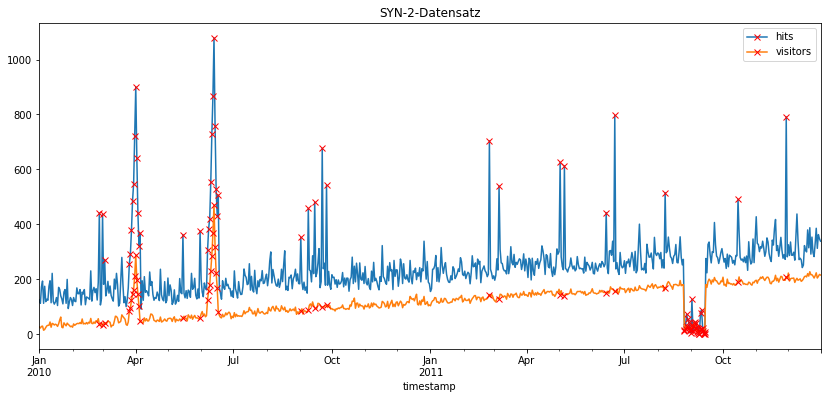

In [4]:
pre = Preprocessor(approximateStateSize=1)
gen = DataGenerator(pre, originalInput)
df = gen.generateSyntheticData(seed=1, periods=365 * 2, trendForColumns=["visitors", "hits"], trendSlope=0.25)
df = df.set_index("timestamp")

osim = WebAnalyticsOutlierSimulator(df)
osim.insertPointOutliers(["hits"], absoluteStartIndex=30, freq=0.03, weight=0.6, seed=1)
osim.insertLevelShift(["hits", "visitors"], absoluteStartIndex=20, weight=0.9, seed=1)
osim.insertPeek(["hits", "visitors"], absoluteStartIndex=20, seed=1)
osim.insertPeek(["hits", "visitors"], absoluteStartIndex=20, seed=1, weight=0.8)

outliers = osim.result["anomalyClass"] == 1
osim.result[["hits", "visitors"]].plot(figsize=(14,6), marker="x", markevery=outliers.tolist(), markeredgecolor="r", title="SYN-2-Datensatz")
plt.margins(x=0)
plt.show()

## SYN-3-Datensätze

Datensatz mit 787 Datenpunkten, in dem Ausfälle unterschiedlicher Länge simuliert werden können.

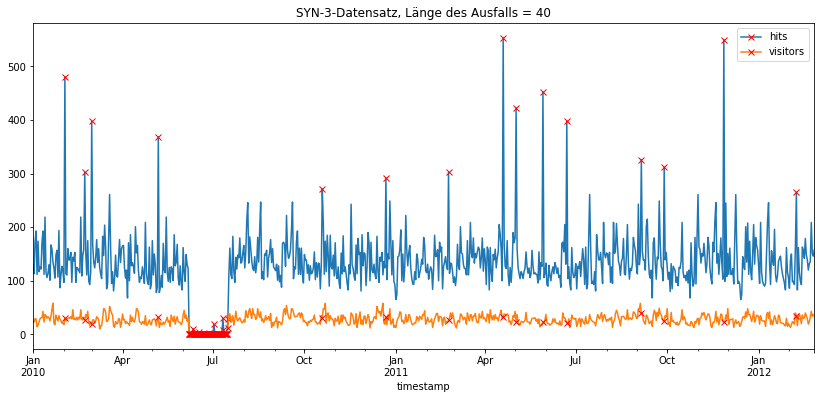

In [5]:
pre = Preprocessor(approximateStateSize=1)
gen = DataGenerator(pre, originalInput)
df = gen.generateSyntheticData(seed=1, periods=787)
df = df.set_index("timestamp")


lengthOfFailure = 40

osim = WebAnalyticsOutlierSimulator(df)
osim.insertLevelShift(["hits", "visitors"], absoluteStartIndex=20, weight=1.33, seed=1, length=lengthOfFailure)
osim.insertPointOutliers(["hits"], absoluteStartIndex=30, freq=0.02, weight=0.75, seed=1)

outliers = osim.result["anomalyClass"] == 1
osim.result[["hits", "visitors"]].plot(figsize=(14,6), marker="x", markevery=outliers.tolist(), markeredgecolor="r", title="SYN-3-Datensatz, Länge des Ausfalls = " + str(lengthOfFailure))
plt.margins(x=0)
plt.show()